# Title
## Frank Coleman III
### Dataset retrieved from: 


TODO - talk about EDA

TODO - talk about the dataset (source, what it contains, how it will be useful)
  - 
  - 
  - 
  - 

## Data Preparation and Cleaning

1. Load the file using Pandas
2. Look at some information about the data & the columns
3. Fix any missing or incorrect values

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("notion_export.csv")
df.head()


,Type,Name,Language/Software,Packages,Tags,Author,Created,Status,Score/5,URL,Source,Minutes,Finish Date,Start Date,Hours,Notes?,Linked Up?,Related to Coding Course Notes (Property),Property
0,Video,How To Become Expertise in Exploratory Data An...,Python,"matplotlib, pandas, seaborn","#66DaysofData, Exploratory Data Analysis, Round1",Krish Naik,"January 1, 2022 11:32 PM",Finished,⭐️⭐️⭐️,https://www.youtube.com/watch?v=dP170R-wO-8,YouTube,10.1,"January 1, 2022","January 1, 2022",0.168333,No,No,NaN,NaN
1,NaN,101 Best Places to Learn to Code For Free | Le...,NaN,NaN,NaN,NaN,"January 1, 2022 10:52 PM",NaN,NaN,https://learntocodewith.me/posts/code-for-free/,NaN,NaN,NaN,NaN,0.000000,No,No,NaN,NaN
2,Video,Data Science Project from Scratch - Part 4 (Ex...,Python,"matplotlib, pandas, seaborn","#66DaysofData, DS Projects, Exploratory Data A...",Ken Jee,"January 1, 2022 9:28 PM",Finished,⭐️⭐️⭐️⭐️,https://www.youtube.com/watch?v=QWgg4w1SpJ8&t=28s,YouTube,68.6,"January 1, 2022","January 1, 2022",1.143333,No,No,NaN,NaN
3,Article,I doubled my salary by switching to Tech! | by...,NaN,NaN,"#66DaysofData, Career, Round1",Lanise Allen,"January 1, 2022 5:32 PM",Finished,NaN,https://laniseallen.medium.com/i-doubled-my-sa...,Medium,3.0,"January 1, 2022","January 1, 2022",0.050000,No,No,NaN,NaN
4,Video,How I Would Learn Data Science in 2022 (If I H...,NaN,NaN,"#66DaysofData, Learning and Roadmaps, Round1",Ken Jee,"January 1, 2022 5:04 PM",Finished,NaN,https://www.youtube.com/watch?v=xpIFS6jZbe8,YouTube,12.2,"January 1, 2022","January 1, 2022",0.203333,No,No,NaN,NaN


In [3]:
df.columns

Index(['Type', 'Name', 'Language/Software', 'Packages', 'Tags', 'Author',
       'Created', 'Status', 'Score/5', 'URL', 'Source', 'Minutes',
       'Finish Date', 'Start Date', 'Hours', 'Notes?', 'Linked Up?',
       'Related to Coding Course Notes (Property)', 'Property'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 19 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Type                                       79 non-null     object 
 1   Name                                       113 non-null    object 
 2   Language/Software                          15 non-null     object 
 3   Packages                                   7 non-null      object 
 4   Tags                                       78 non-null     object 
 5   Author                                     35 non-null     object 
 6   Created                                    114 non-null    object 
 7   Status                                     59 non-null     object 
 8   Score/5                                    21 non-null     object 
 9   URL                                        106 non-null    object 
 10  Source                    

In [5]:
df.describe()

,Minutes,Hours,Property
count,40.000000,114.000000,0.0
mean,67.680500,0.395792,NaN
std,131.640925,1.397761,NaN
min,1.000000,0.000000,NaN
25%,10.272500,0.000000,NaN
50%,29.000000,0.000000,NaN
75%,57.475000,0.174292,NaN
max,739.900000,12.331667,NaN


In [6]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)


3

In [7]:
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentages


Property                                     1.000000
Related to Coding Course Notes (Property)    0.991228
Packages                                     0.938596
Language/Software                            0.868421
Score/5                                      0.815789
Source                                       0.763158
Finish Date                                  0.710526
Author                                       0.692982
Start Date                                   0.666667
Minutes                                      0.649123
Status                                       0.482456
Tags                                         0.315789
Type                                         0.307018
URL                                          0.070175
Name                                         0.008772
Hours                                        0.000000
Notes?                                       0.000000
Linked Up?                                   0.000000
Created                     

<AxesSubplot:>

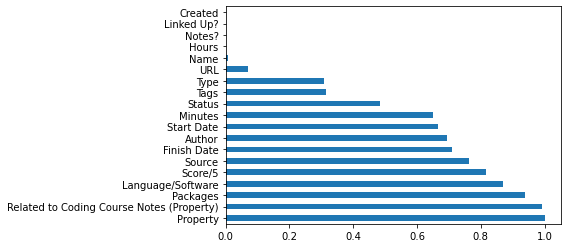

In [8]:
missing_percentages.plot(kind='barh')

## Exploratory Analysis and Visualization

Columns we'll analyze:

1. Type
2. Start Date and Finish Date
3. Language/Software
4. Tags
5. Source
6. Author
7. Minutes

In [9]:
df.columns

Index(['Type', 'Name', 'Language/Software', 'Packages', 'Tags', 'Author',
       'Created', 'Status', 'Score/5', 'URL', 'Source', 'Minutes',
       'Finish Date', 'Start Date', 'Hours', 'Notes?', 'Linked Up?',
       'Related to Coding Course Notes (Property)', 'Property'],
      dtype='object')

In [10]:
df.pivot_table(values='Hours', index='Type', columns='Status')

Status,Finished,Not Started,Started
Type,,,
Article,0.102381,0.0,0.000000
Book,NaN,NaN,0.000000
Course,0.928033,NaN,3.266333
Podcast,0.908333,0.0,NaN
Tweet,0.016667,NaN,NaN
Video,0.470493,NaN,1.168333


## Ask and Answer Question

1. What type of resources did I consume the most? Quantity and time-wise.
2. What days of thje week did I finish most resources?
3. Who's my favorite author?
4. What was tagged the most?
5. Total time spent on #66DaysofData

## Summary and Conclusion


Insights:
- I only gave myself credit for the resources I finished.
- There is inevitably missing data. Some videos I watched, articles I read didn't get input into the system.
- 
- 